# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [12]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [13]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.74, 即時現金賣出: 30.41


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [14]:
for rate in rate_table:
    currency = rate.find(name='div',attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(' ',''))
    buy_rate = rate.find(name='td', attrs={'data-table':'本行現金買入'})
    sell_rate = rate.find(name='td', attrs={'data-table':'本行現金賣出'})
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))
    print()


美金(USD)

即時現金買入: 29.74, 即時現金賣出: 30.41


港幣(HKD)

即時現金買入: 3.723, 即時現金賣出: 3.927


英鎊(GBP)

即時現金買入: 37.84, 即時現金賣出: 39.96


澳幣(AUD)

即時現金買入: 19.85, 即時現金賣出: 20.63


加拿大幣(CAD)

即時現金買入: 22.19, 即時現金賣出: 23.1


新加坡幣(SGD)

即時現金買入: 21.39, 即時現金賣出: 22.3


瑞士法郎(CHF)

即時現金買入: 30.31, 即時現金賣出: 31.51


日圓(JPY)

即時現金買入: 0.2675, 即時現金賣出: 0.2803


南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -


瑞典幣(SEK)

即時現金買入: 2.74, 即時現金賣出: 3.26


紐元(NZD)

即時現金買入: 19.01, 即時現金賣出: 19.86


泰幣(THB)

即時現金買入: 0.8499, 即時現金賣出: 1.0379


菲國比索(PHP)

即時現金買入: 0.5202, 即時現金賣出: 0.6532


印尼幣(IDR)

即時現金買入: 0.00188, 即時現金賣出: 0.00258


歐元(EUR)

即時現金買入: 32.49, 即時現金賣出: 33.83


韓元(KRW)

即時現金買入: 0.02363, 即時現金賣出: 0.02753


越南盾(VND)

即時現金買入: 0.00092, 即時現金賣出: 0.00142


馬來幣(MYR)

即時現金買入: 6.21, 即時現金賣出: 7.854


人民幣(CNY)

即時現金買入: 4.212, 即時現金賣出: 4.374



## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

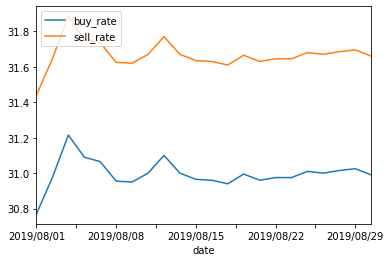

In [15]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

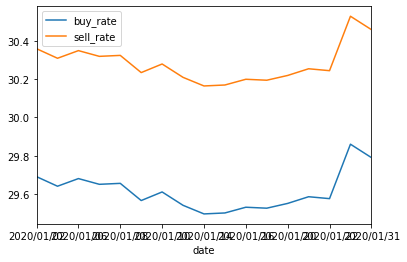



港幣(HKD)



<Figure size 720x576 with 0 Axes>

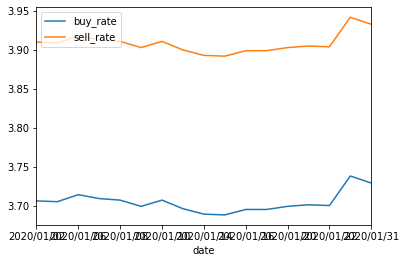



英鎊(GBP)



<Figure size 720x576 with 0 Axes>

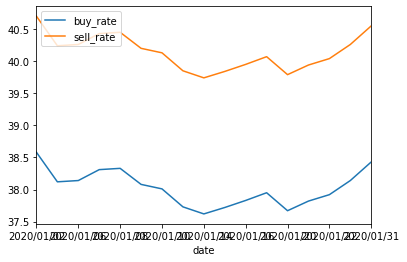



澳幣(AUD)



<Figure size 720x576 with 0 Axes>

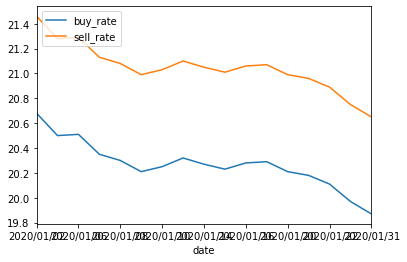



加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

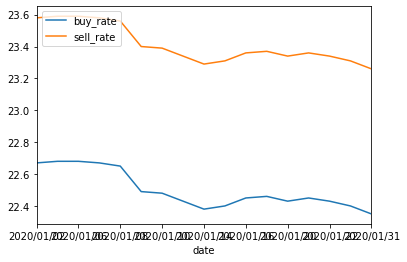



新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

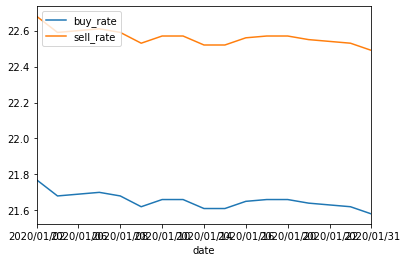



瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

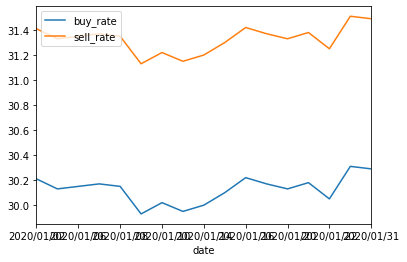



日圓(JPY)



<Figure size 720x576 with 0 Axes>

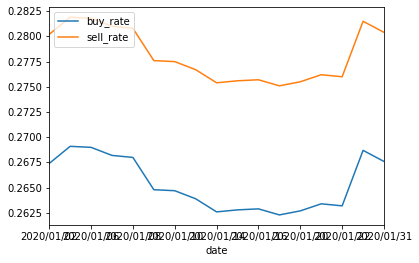



南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

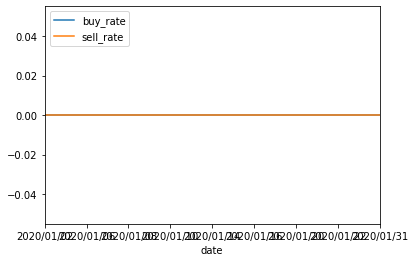



瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

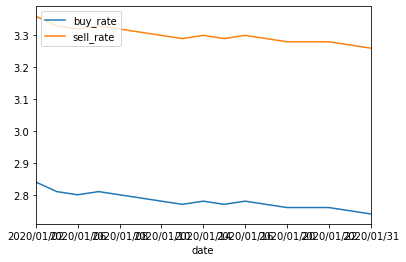



紐元(NZD)



<Figure size 720x576 with 0 Axes>

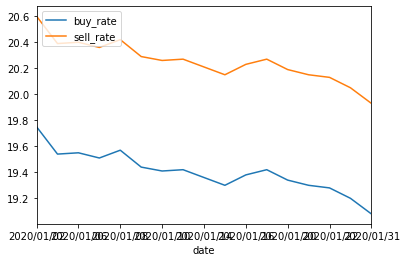



泰幣(THB)



<Figure size 720x576 with 0 Axes>

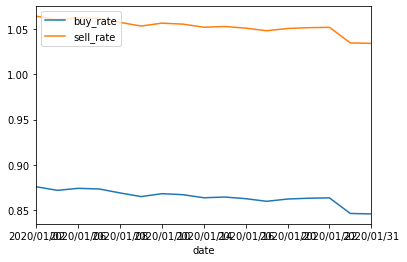



菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

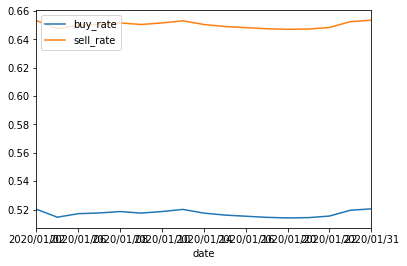



印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

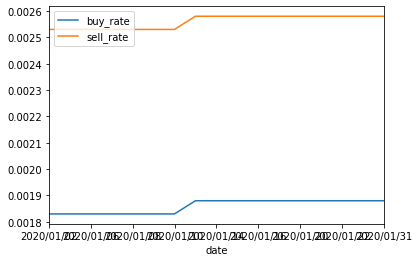



歐元(EUR)



<Figure size 720x576 with 0 Axes>

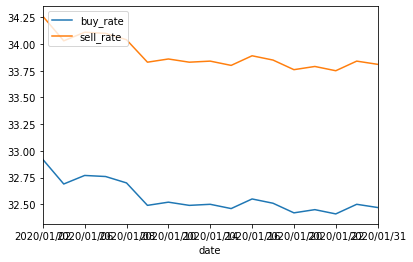



韓元(KRW)



<Figure size 720x576 with 0 Axes>

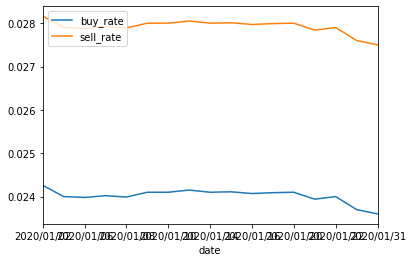



越南盾(VND)



<Figure size 720x576 with 0 Axes>

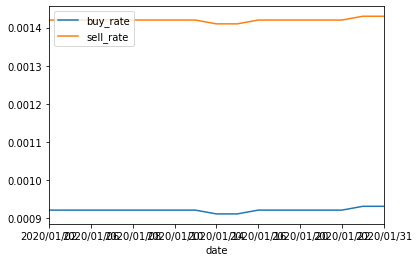



馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

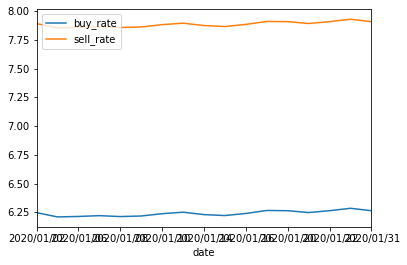



人民幣(CNY)



<Figure size 720x576 with 0 Axes>

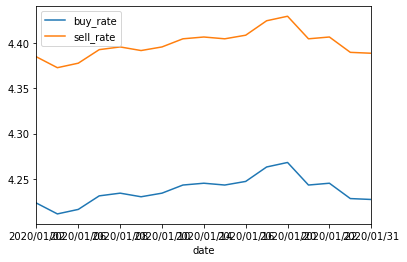

In [18]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for rate in rate_table:
    currency = rate.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類

    history_link = rate.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

    quote_history_url = history_rate_link.replace("history", "quote/2020-01")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        date_history.append(date)  
        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  
        history_sell.append(float(history_ex_rate[1].get_text()))  

    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()
    print()